### Import Packages

In [1]:
import warnings
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib
import matplotlib.pylab as plt
import pandas_profiling

pd.set_option('max_columns', None)

warnings.filterwarnings("ignore")

%matplotlib inline

### Load Dataset

In [2]:
df = pd.read_csv("Netflix Dataset.csv")

In [3]:
df = df.drop(['Show_Id', 'Description'], axis=1)

### Explore Dataset

In [4]:
df.head()

,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies"
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies"
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas


In [5]:
df.shape

(7789, 9)

In [6]:
df.dtypes

Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
dtype: object

In [7]:
df.columns

Index(['Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date',
       'Rating', 'Duration', 'Type'],
      dtype='object')

### Data Prep

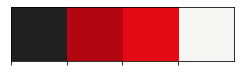

In [8]:
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

In [9]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

### Movie & TV Distribution

In [10]:
x = df.groupby(['Category'])['Category'].count()
y = len(df)

r = ((x/y)).round(2) 

ratio_ = pd.DataFrame(r).T 

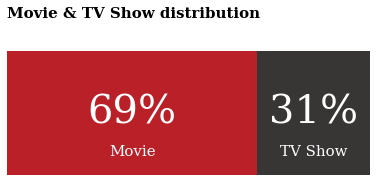

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6.5, 2.5))

ax.barh(ratio_.index, ratio_['Movie'], color='#b20710', alpha=0.9)
ax.barh(ratio_.index,
        ratio_['TV Show'],
        color='#221f1f',
        left=ratio_['Movie'],
        alpha=0.9)

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

for i in ratio_.index:
    ax.annotate(f"{int(ratio_['Movie'][i]*100)}%",
                xy=(ratio_['Movie'][i] / 2, i),
                va='center',
                ha='center',
                fontsize=40,
                fontweight='light',
                fontfamily='serif',
                color='white')

    ax.annotate("Movie",
                xy=(ratio_['Movie'][i] / 2, -0.25),
                va='center',
                ha='center',
                fontsize=15,
                fontweight='light',
                fontfamily='serif',
                color='white')

for i in ratio_.index:
    ax.annotate(f"{int(ratio_['TV Show'][i]*100)}%",
                xy=(ratio_['Movie'][i] + ratio_['TV Show'][i] / 2, i),
                va='center',
                ha='center',
                fontsize=40,
                fontweight='light',
                fontfamily='serif',
                color='white')
    ax.annotate("TV Show",
                xy=(ratio_['Movie'][i] + ratio_['TV Show'][i] / 2, -0.25),
                va='center',
                ha='center',
                fontsize=15,
                fontweight='light',
                fontfamily='serif',
                color='white')

fig.text(0.125,
         1.03,
         'Movie & TV Show distribution',
         fontfamily='serif',
         fontsize=15,
         fontweight='bold')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

plt.show()

### Top Countries on Netflix

In [12]:
top_country = df.groupby(['Country']).size().sort_values(ascending=False)[:10]
top_country

Country
United States     2556
India              923
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Mexico             100
dtype: int64

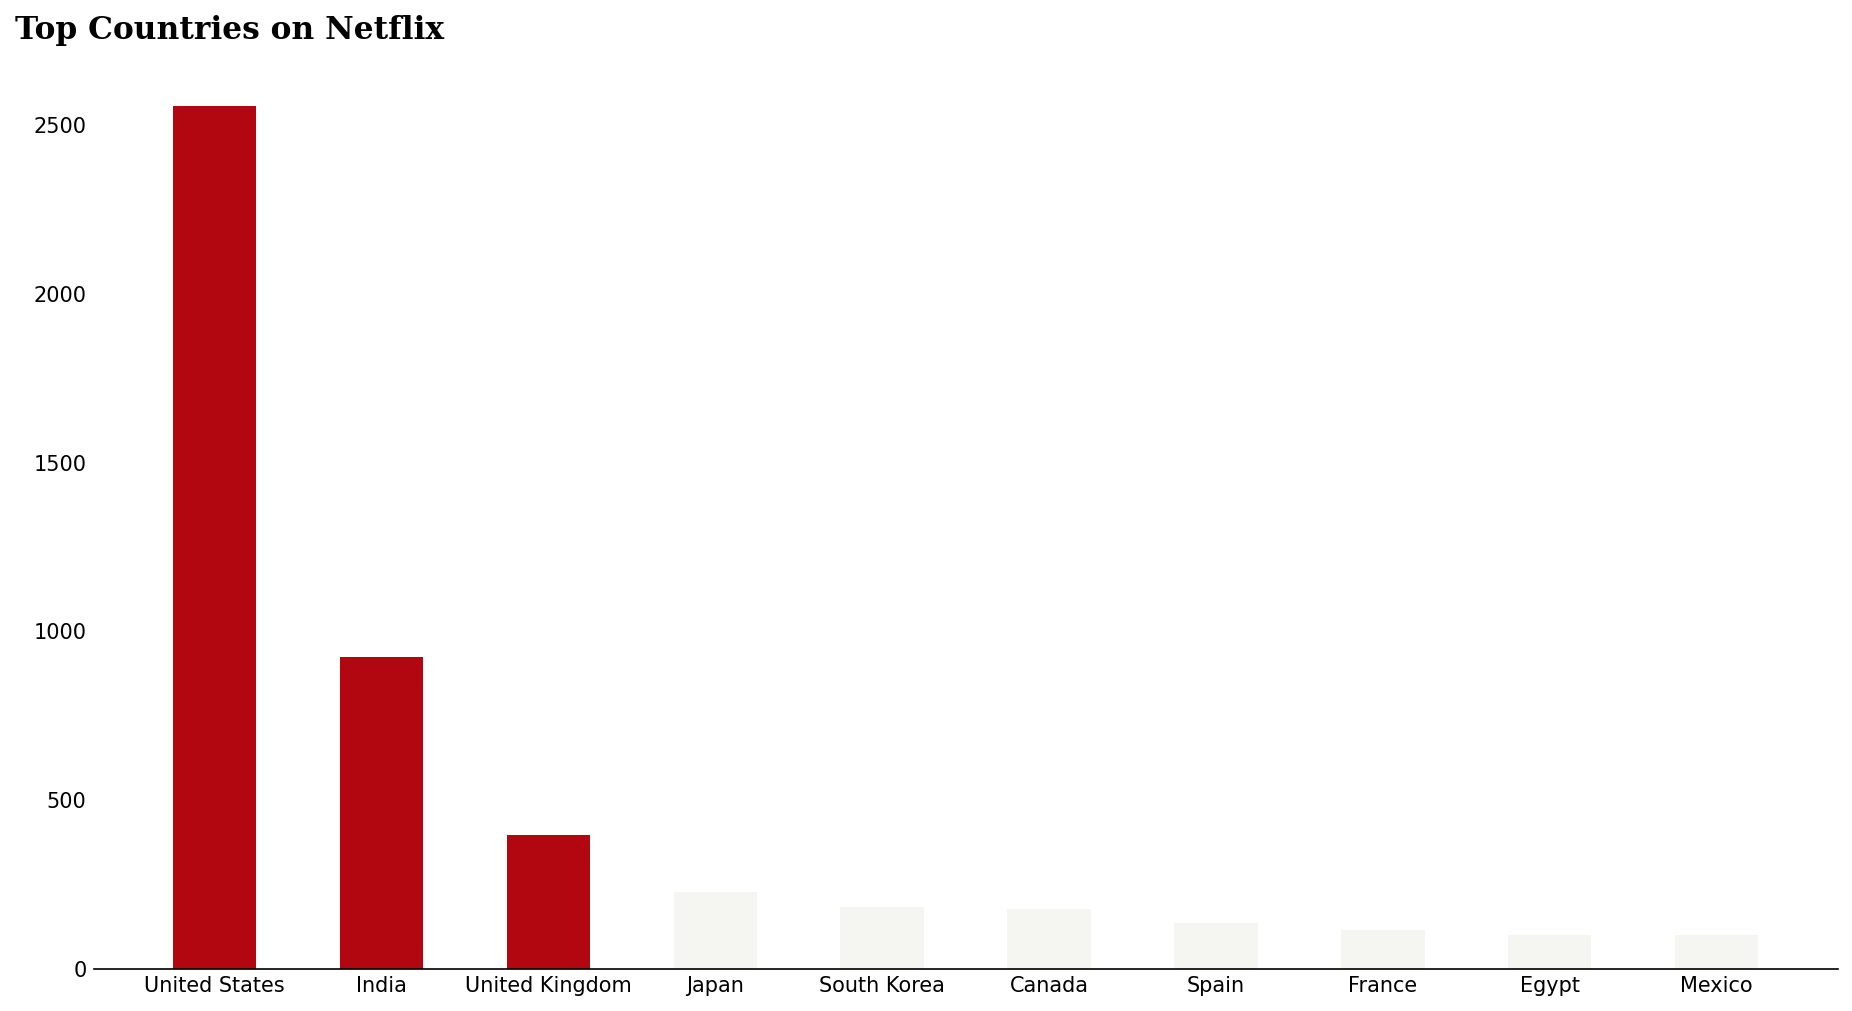

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8), dpi=150)

color_map = ['#f5f5f1' for _ in range(11)]
color_map[0] = color_map[1] = color_map[2] = '#b20710'

ax.bar(top_country.index,
       top_country,
       width=0.5,
       linewidth=0.6,
       color=color_map)

ax.tick_params(axis=u'both', which=u'both', length=0)

fig.text(0.09,
         .9,
         'Top Countries on Netflix',
         fontfamily='serif',
         fontsize=15,
         fontweight='bold')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

### Netflix's Target Demographic by Country

In [14]:
filtered = df.groupby(['Country']).size().sort_values(ascending=False).reset_index(name='Count')[:11]

In [15]:
Country_list = filtered.Country.to_list()

In [16]:
bool_series = df.Country.isin(Country_list)
Country_fil = df[bool_series]

In [17]:
filtered_cross = pd.crosstab(Country_fil['Country'], Country_fil['Rating'], normalize='index').T

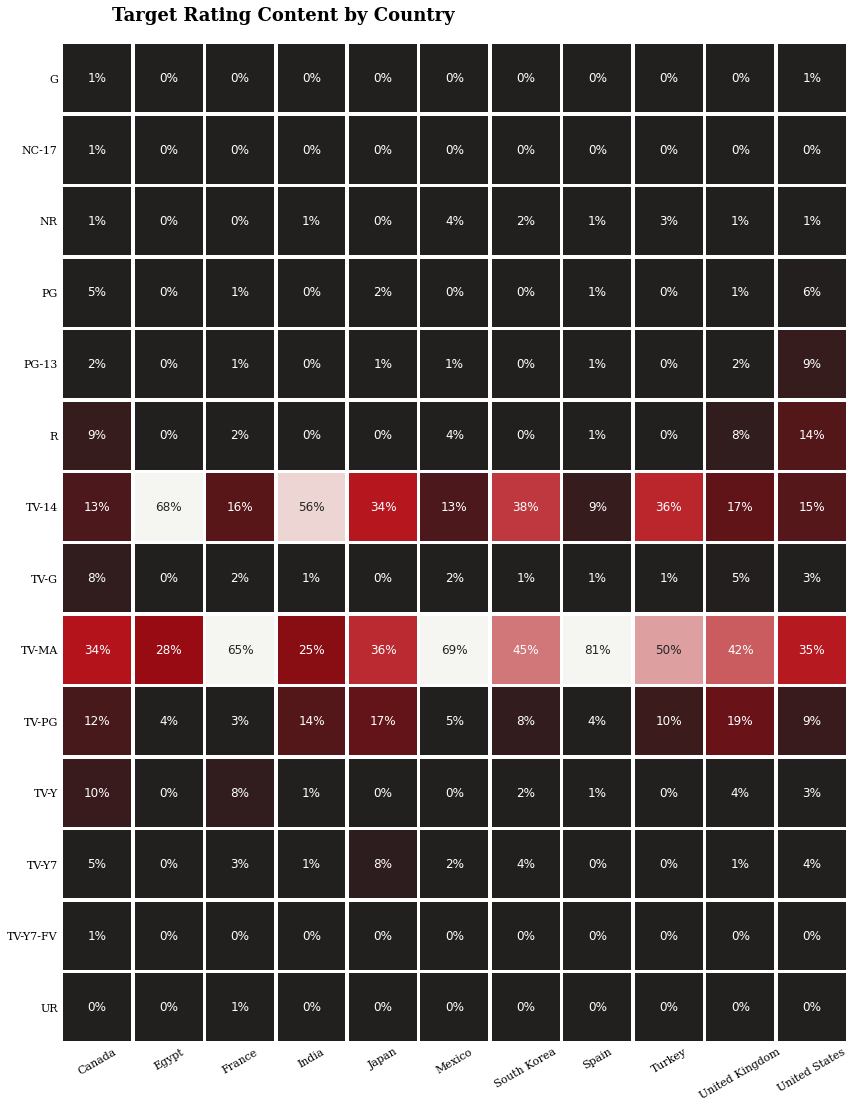

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ['#221f1f', '#b20710', '#f5f5f1'])

sns.heatmap(data=filtered_cross,
            cmap=cmap,
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})

fig.text(0.5,
         1.01,
         'Target Rating Content by Country',
         fontweight='bold',
         fontfamily='serif',
         fontsize=18,
         ha='right')

ax.set_yticklabels(ax.get_yticklabels(),
                   fontfamily='serif',
                   rotation=0,
                   fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(),
                   fontfamily='serif',
                   rotation=30,
                   fontsize=11)
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both', length=0)

plt.tight_layout()
plt.show()

### Netflix Over The Years

In [19]:
df['Year'] = df['Release_Date'].dt.year

In [20]:
df = df.astype({'Year':'int64'}, errors='ignore')

In [21]:
yr_filter = df.groupby(['Year'])['Title'].count().reset_index()

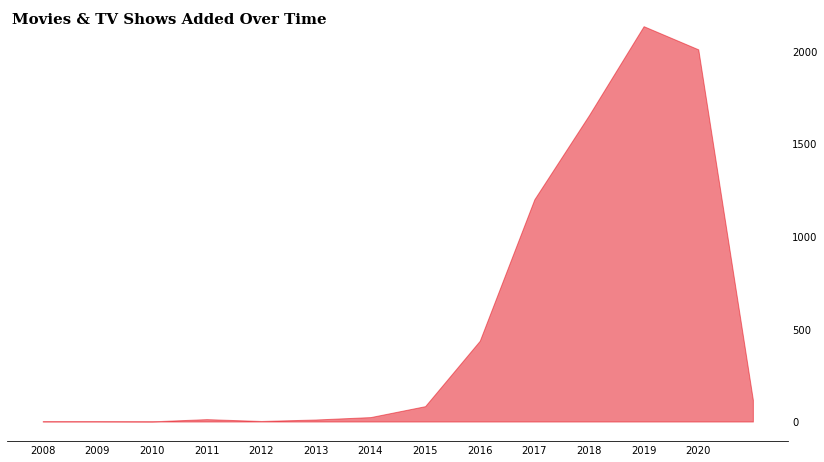

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

ax.fill_between(yr_filter['Year'],
                yr_filter['Title'],
                color='#e50914',
                alpha=0.5)

fig.text(0.13,
         0.85,
         'Movies & TV Shows Added Over Time',
         fontsize=15,
         fontweight='bold',
         fontfamily='serif')

plt.xticks(np.arange(2008, 2021, 1))
ax.yaxis.tick_right()

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.tick_params(axis=u'both', which=u'both', length=0)

plt.show()